## Imports

In [4]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import warnings
warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)

In [6]:
def read_and_preprocess_image(image_path):
    with rasterio.open(image_path) as src:
        # Read the data (you may need to modify this based on your specific use case)
        data = src.read(1)
        # Optionally, perform additional preprocessing here (e.g., cropping, resampling)
        return data, src.transform, src.crs, src.bounds

In [7]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping


In [8]:
def cnn_model():
 """
 Returns a compiled keras Conv2D model

 :param tuple input_shape: shape of ONE example as passed to the first
 :param int num_classes: number of output classes as passed to the las
 """

 model = keras.models.Sequential()

 model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(64,64,1)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.3))

 model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.3))

 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(BatchNormalization())
 model.add(Flatten())
 model.add(Dense(512, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(0.3))
 model.add(Dense(1,activation='sigmoid'))

 model.compile(loss="binary_crossentropy",
               optimizer='adam',
               metrics=['accuracy'])
 return model

In [9]:
def load_from_metadata(csv_path):
    data = pd.read_csv(csv_path)
    X = []
    Y = []
    for _ , row in data.iterrows():
        X.append(read_and_preprocess_image(row["path"]+".tif")[0])
        Y.append(int(row["plume"]=="yes"))

    return np.array(X), np.array(Y)

In [10]:
# X, Y = load_from_metadata("metadata.csv")
# X = X / X.max()

# seed = 42
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,shuffle=True,random_state=seed)

In [11]:
def cnn_model1():
 model = keras.models.Sequential()

 model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(64,64,1)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.3))

 model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.4))

 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(BatchNormalization())
 model.add(Flatten())
 model.add(Dense(512, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(0.4))
 model.add(Dense(1,activation='sigmoid'))
#  sgd = SGD(learning_rate=0.1)

 model.compile(loss="binary_crossentropy",
               optimizer='adam',
               metrics=['accuracy'])
 return model

In [12]:
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from keras.models import Model
# from keras.applications import ResNet50

# from keras.layers import (
#     Input,
#     Dense,
#     GlobalAveragePooling2D,
#     Flatten,
#     Dropout
# )

# def resnet_model():
#     model = keras.models.Sequential()

#     # Original single-channel input
#     single_channel_input = keras.layers.Input(shape=(64, 64, 1))
#     stacked_input = keras.layers.Concatenate(axis=-1)([single_channel_input, single_channel_input, single_channel_input])

#     base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=stacked_input)
#     base_model.trainable = False

#     model.add(base_model)

#     model.add(GlobalAveragePooling2D())
#     model.add(Flatten())
#     model.add(Dense(1024, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(64, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation="sigmoid"))

#     model.compile(loss="binary_crossentropy",
#                 optimizer='adam',
#                 metrics=['accuracy'])
#     return model

In [13]:
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(monitor='loss', patience=8)

# model = cnn_model1()
# history = model.fit(x_train,y_train,epochs=50,callbacks=[callback],validation_data=(x_test,y_test))

In [18]:
def load_coord_from_metadata(csv_path):
    data = pd.read_csv(csv_path)
    X = []
    Y = []
    for _ , row in data.iterrows():
        if row["plume"]=="no":
            continue
        X.append(read_and_preprocess_image(row["path"]+".tif")[0])
        Y.append([row["coord_x"],row["coord_y"]])

    return np.array(X), np.array(Y)

In [34]:
def cnn_model_pos():
 model = keras.models.Sequential()

 model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(64,64,1)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.3))

 model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.3))

 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
#  model.add(BatchNormalization())
 model.add(Flatten())
 model.add(Dense(512, activation='linear'))
 model.add(Dropout(0.2))
 model.add(Dense(2,activation='linear'))

 sgd = SGD(learning_rate=0.05)

 model.compile(loss="mse",
               optimizer=sgd,)
 return model

In [76]:
xx, yy = load_coord_from_metadata("metadata.csv")
# xx = xx / xx.max()
# yy = yy / 64

seed = 42
from sklearn.model_selection import train_test_split
# xx_train, xx_test, yy_train, yy_test = train_test_split(xx/xx.max(),yy/64,train_size=0.8,shuffle=True,random_state=seed)

from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(monitor='loss', patience=8)

# model = cnn_model_pos()
# history = model.fit(xx_train,yy_train,epochs=30,validation_data=(xx_test,yy_test))

In [52]:
pred = model.predict(xx_test)

2/2 [==============================] - 0s 7ms/step


In [74]:
M = 10
for i in range(M):
    print(f"pred: {pred[i][0]*64},{pred[i][1]*64} vs real: {yy[i][0]},{yy[i][1]}")

pred: 33.11602020263672,37.42488479614258 vs real: 0.375,0.734375
pred: 31.016565322875977,34.942317962646484 vs real: 0.65625,0.578125
pred: 23.937528610229492,16.801925659179688 vs real: 0.90625,0.234375
pred: 27.47979164123535,32.26692581176758 vs real: 0.4375,0.96875
pred: 30.702016830444336,16.958595275878906 vs real: 0.921875,0.6875
pred: 27.57605743408203,10.120855331420898 vs real: 0.359375,0.234375
pred: 37.939414978027344,29.37694549560547 vs real: 0.328125,-0.03125
pred: 27.127859115600586,31.341259002685547 vs real: 0.578125,0.875
pred: 24.852903366088867,34.86420440673828 vs real: 0.640625,1.0
pred: 26.669450759887695,36.3239631652832 vs real: 0.984375,1.015625


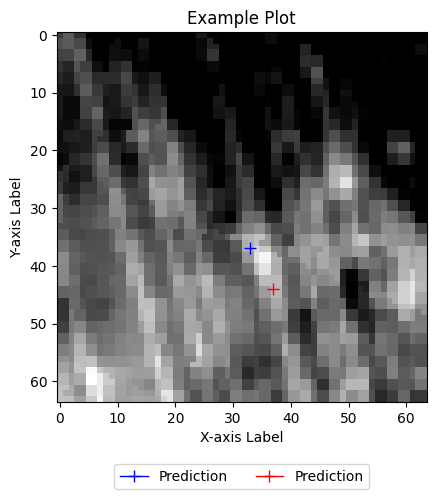

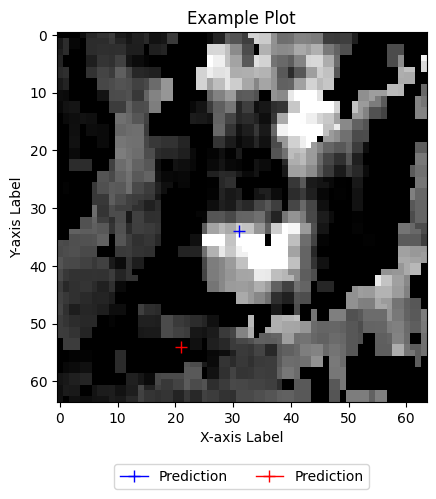

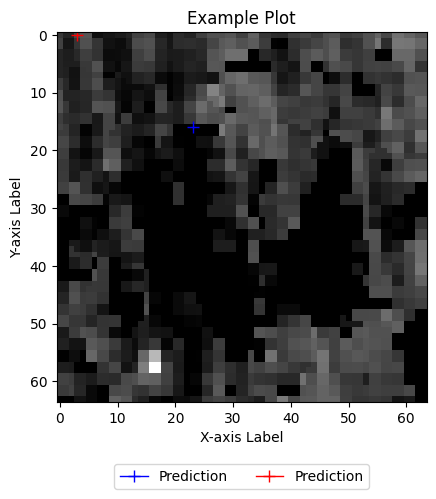

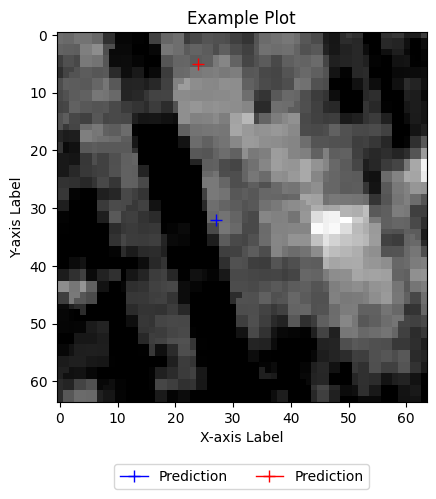

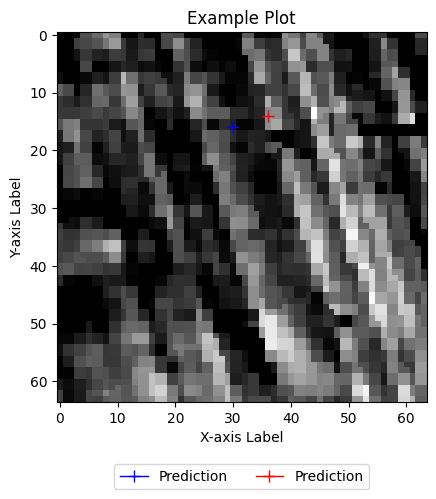

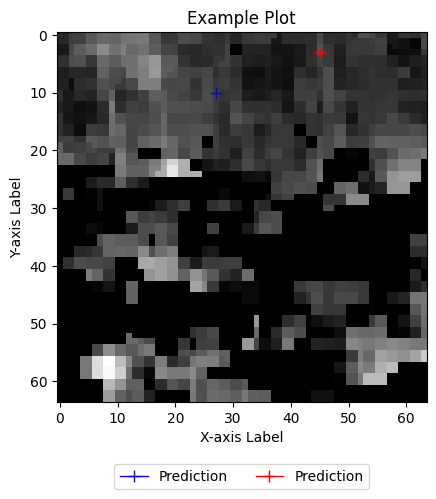

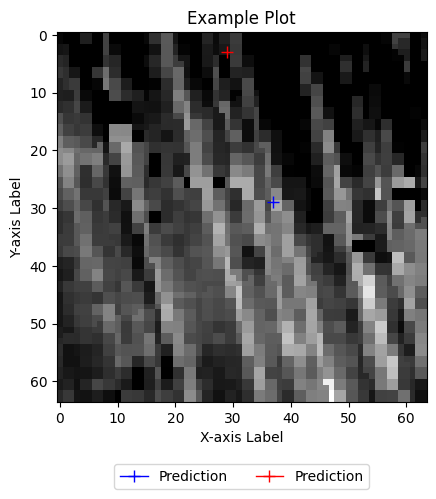

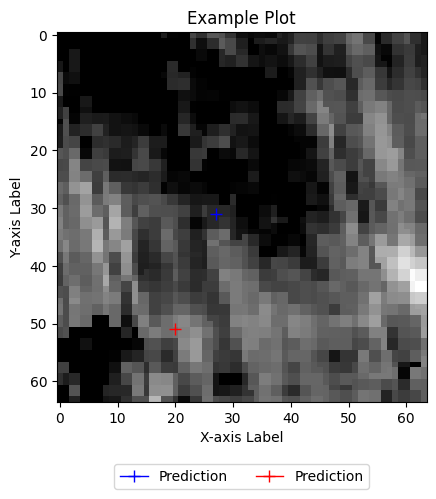

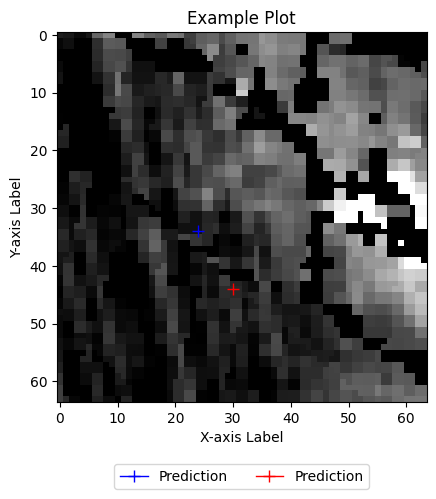

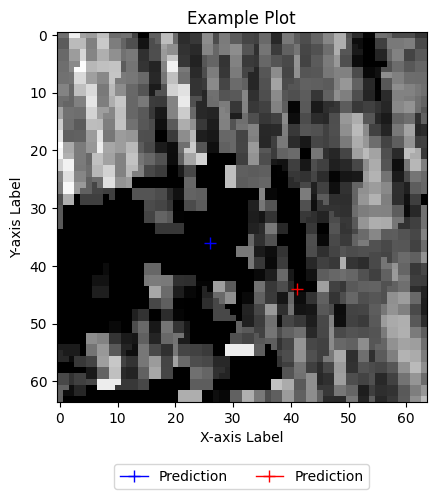

In [73]:
import matplotlib.pyplot as plt
M = 10
for i in range(M):
    plt.imshow(xx[i],cmap="gray")
    plt.plot(int(pred[i][0]*64),int(pred[i][1]*64),c="b",label="Prediction",marker="+",linewidth=1,markersize=8)
    plt.plot(int(yy_test[i][0]*64),int(yy_test[i][1]*64),c='r',label="Prediction",marker="+",linewidth=1,markersize=8)

    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.title('Example Plot')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
    plt.show()

# Pytorch Res Net 2

In [12]:
# import torch
# from torchvision import transforms
# from torch.utils.data import DataLoader, Dataset,random_split
# from sklearn.metrics import classification_report, f1_score, roc_auc_score
# import torch.optim.lr_scheduler as lr_scheduler
# import torch.nn as nn
# import torchvision.models as models
# from tqdm import tqdm

In [13]:
# # Define the device for training (CPU or GPU if available)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load the pre-trained ResNet50 model
# resnet50 = models.wide_resnet50_2(weights='Wide_ResNet50_2_Weights.IMAGENET1K_V2')

# # Modify the first layer to accept single-channel grayscale images
# resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# # Modify the last fully connected layer for binary classification with softmax activation
# num_classes = 2  # 2 classes: 1 or 0
# resnet50.fc = nn.Sequential(
#     nn.Linear(resnet50.fc.in_features, num_classes)
# )

In [14]:
# # Move the model to the device
# resnet50 = resnet50.to(device)

# # Define the loss function (criterion)
# criterion = nn.CrossEntropyLoss()

# # Define the optimizer
# optimizer = torch.optim.Adam(resnet50.parameters(), lr=0.001)

# num_epochs = 40

In [15]:
# class CustomDataset(Dataset):
#     def __init__(self, images, labels, transform=None):
#         self.images = images
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         image = self.images[idx]
#         label = self.labels[idx]

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# # Define batch size for training and validation
# batch_size = 32

# train_dataset = CustomDataset(images=x_train, labels=x_train)
# val_dataset = CustomDataset(images=x_test, labels=y_test)

# # Create the train DataLoader
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Create the validation DataLoader
# val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [16]:
# from sklearn.metrics import classification_report, f1_score, roc_auc_score
# best_auc = 0.0
# # Training loop
# for epoch in tqdm(range(num_epochs), desc="Epochs"):
#     resnet50.train()  # Set the model to training mode

#     epoch_loss = 0.0  # Accumulator for epoch loss
#     for images, labels in train_loader:
#         # print(images,labels)
#         images = images.to(device, dtype=torch.float)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = resnet50(images)
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Accumulate the loss
#         epoch_loss += loss.item()

#     # Compute the average loss for the epoch
#     epoch_loss /= len(train_loader)
#     tqdm.write(f"Epoch {epoch+1}/{num_epochs} - Average Loss: {epoch_loss}")

#     # Validation loop
#     resnet50.eval()  # Set the model to evaluation mode

#     true_probabilities = []
#     predicted_probabilities = []

#     with torch.no_grad():
#         for images, labels in val_loader:
#             # images = images.to(device, dtype=torch.float)
#             # labels = labels.to(device)

#             # Forward pass
#             outputs = resnet50(images)
#             probabilities = torch.softmax(outputs, dim=1)

#             # Collect predicted probabilities and true labels
#             predicted_probabilities.extend(probabilities[:, 1].cpu().numpy())  # Assuming binary classification
#             true_probabilities.extend(labels.cpu().numpy())

#     # Compute the AUC
#     auc = roc_auc_score(true_probabilities, predicted_probabilities)
#     print(f"Validation AUC: {auc}")

#     # Check if current accuracy is better than the previous best accuracy
#     if auc > best_auc:
#         best_auc = auc
#         torch.save(resnet50.state_dict(), f"resnet50_{best_auc:.4f}.pth")  # Save the model with AUC in the filename
#         print("Saved")